In [1]:
import numpy as np
import pandas as pd
import scipy as scp 
from scipy.stats import multivariate_normal
import math
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets

### Create Data for clustering

Simulate data from 5 different Gaussian distributions with different mean and covariance. Each of these distributions will be learnt and clustered separately using K-Means and EM-GMM

In [2]:
# Number of Dims (D) for X = 2

np.random.seed(6962)

trg_1 = 0
trg_2 = 1
trg_3 = 2
trg_4 = 3
trg_5 = 4

sample_size_1 = 5000
sample_size_2 = 2000
sample_size_3 = 3000
sample_size_4 = 4000
sample_size_5 = 1000

In [3]:
# Samples with D = 5

# samples_cluster_1 = np.random.multivariate_normal(mean=[1, 3, 2, 7, 1], cov = sklearn.datasets.make_spd_matrix(5, random_state=None), size=sample_size_1)
# samples_cluster_1 = np.hstack([samples_cluster_1, np.array([trg_1] * sample_size_1).reshape(sample_size_1, 1)])

# samples_cluster_2 = np.random.multivariate_normal(mean=[2, 2, -1, 6, 5], cov = sklearn.datasets.make_spd_matrix(5, random_state=None), size=sample_size_2)
# samples_cluster_2 = np.hstack([samples_cluster_2, np.array([trg_2] * sample_size_2).reshape(sample_size_2, 1)])

# samples_cluster_3 = np.random.multivariate_normal(mean=[3, 3, -2, 4, 1], cov = sklearn.datasets.make_spd_matrix(5, random_state=None), size=sample_size_3)
# samples_cluster_3 = np.hstack([samples_cluster_3, np.array([trg_3] * sample_size_3).reshape(sample_size_3, 1)])

# samples_cluster_4 = np.random.multivariate_normal(mean=[4, -6, -2, 1, 3], cov = sklearn.datasets.make_spd_matrix(5, random_state=None), size=sample_size_4)
# samples_cluster_4 = np.hstack([samples_cluster_4, np.array([trg_4] * sample_size_4).reshape(sample_size_4, 1)])

# samples_cluster_5 = np.random.multivariate_normal(mean=[-2, 5, -3, 8, 1], cov = sklearn.datasets.make_spd_matrix(5, random_state=None), size=sample_size_5)
# samples_cluster_5 = np.hstack([samples_cluster_5, np.array([trg_5] * sample_size_5).reshape(sample_size_5, 1)])

In [4]:
# Samples with D = 2 for easier visualization

c1 = np.repeat(0, sample_size_1)
c2 = np.repeat(1, sample_size_2)
c3 = np.repeat(2, sample_size_3)
c4 = np.repeat(3, sample_size_4)
c5 = np.repeat(4, sample_size_5)

samples_cluster_1 = np.random.multivariate_normal(mean=[1, 1], cov = sklearn.datasets.make_spd_matrix(2, random_state=None), size=sample_size_1)
samples_cluster_1 = np.hstack([samples_cluster_1, np.array([trg_1] * sample_size_1).reshape(sample_size_1, 1)])

samples_cluster_2 = np.random.multivariate_normal(mean=[-7, -4], cov = sklearn.datasets.make_spd_matrix(2, random_state=None), size=sample_size_2)
samples_cluster_2 = np.hstack([samples_cluster_2, np.array([trg_2] * sample_size_2).reshape(sample_size_2, 1)])

samples_cluster_3 = np.random.multivariate_normal(mean=[5, 6], cov = sklearn.datasets.make_spd_matrix(2, random_state=None), size=sample_size_3)
samples_cluster_3 = np.hstack([samples_cluster_3, np.array([trg_3] * sample_size_3).reshape(sample_size_3, 1)])

samples_cluster_4 = np.random.multivariate_normal(mean=[-6, 4], cov = sklearn.datasets.make_spd_matrix(2, random_state=None), size=sample_size_4)
samples_cluster_4 = np.hstack([samples_cluster_4, np.array([trg_4] * sample_size_4).reshape(sample_size_4, 1)])

samples_cluster_5 = np.random.multivariate_normal(mean=[2, -3], cov = sklearn.datasets.make_spd_matrix(2, random_state=None), size=sample_size_5)
samples_cluster_5 = np.hstack([samples_cluster_5, np.array([trg_5] * sample_size_5).reshape(sample_size_5, 1)])

Combine all the samples from the 5 distributions and shuffle. This will ensure input data sequence is random. 

In [5]:
X = np.vstack([samples_cluster_1, samples_cluster_2, samples_cluster_3, samples_cluster_4, samples_cluster_5])
C = np.concatenate([c1, c2, c3, c4, c5], axis=0)
random_state = np.random.get_state()

np.random.shuffle(X)
np.random.set_state(random_state)
np.random.shuffle(C)
X = np.delete(X, np.s_[-1:], axis=1)
np.savetxt("X.csv", X, delimiter=",")

In [6]:
print(X.shape)

(15000, 2)


### Plot

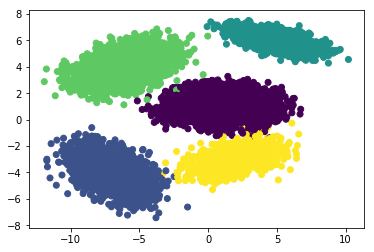

In [7]:
plt.scatter(X[:,0], X[:,1], c=C)

There are some clear visual patterns of the 5 clusters.

We will now learn these clusters using the following 2 models:
 * K-Means (Hard Clustering)
 * Gaussian Mixure Model (using EM method) 

## K-Means

Define KMeans two step process:
 * Assign each input sample to the nearest centroid
 * Recompute each centroid value based on new assigment of input samples

In [8]:
def KMeans_one_step(X, mu):
    C = []
    # Assignment step - assign each x to the nearest centroid. This means find ci for each xi.
    for x in X:
        l2 = []
        for mu_k in mu:
            l2.append(np.linalg.norm(x - mu_k)**2)
        C.append(np.argmin(l2))
    K, n_K = np.unique(C, return_counts=True)
    
    plt.scatter(X[:,0], X[:,1], c=np.array(C))
    plt.show()
    
    # Update step - Recalculate centroid for each cluster based on xi assignment toe cluster

    _mu = []
    for k, n_k in zip(K, n_K):
        mu_k = np.dot((C == k), X)/n_k
        _mu.append(mu_k)
    return _mu

## Coordinate Descent
Run coodinate descent algorithm for 10 iterations to optimize cluster centroids and assignments of input samples

Iteration  1


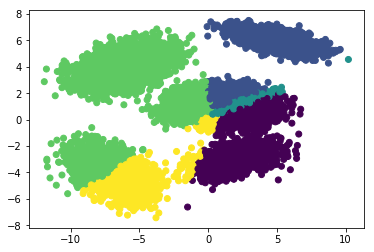

Iteration  2


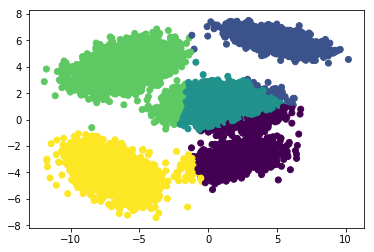

Iteration  3


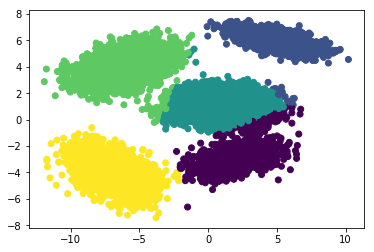

Iteration  4


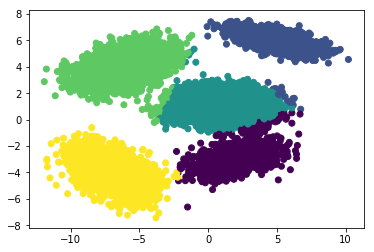

Iteration  5


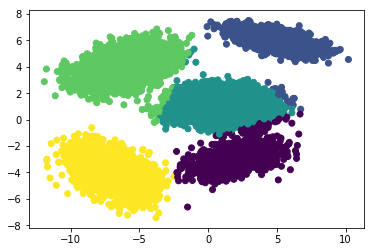

Iteration  6


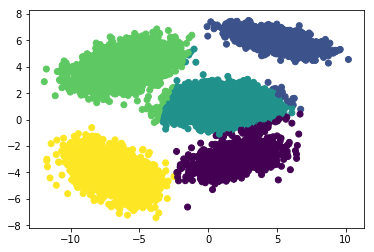

Iteration  7


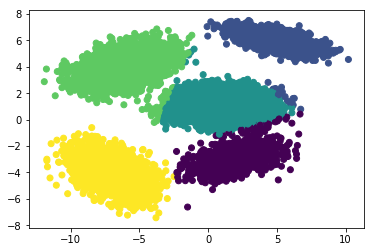

Iteration  8


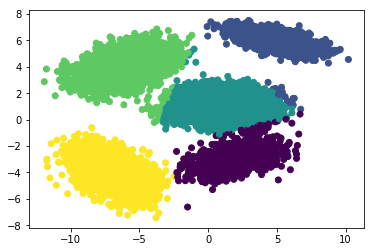

Iteration  9


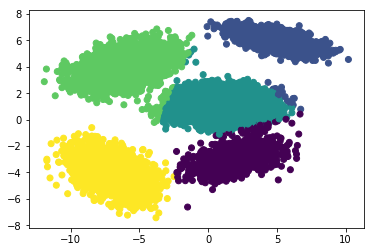

Iteration  10


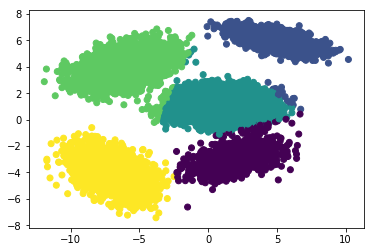

In [9]:
# Initialize the centroids randomly
mu = np.random.rand(5, X.shape[1])

# Calculate centroid for each cluster for 10 iterations
for ctr in range(10):
    print("Iteration ", ctr+1)
    mu = KMeans_one_step(X, mu)

## EM-GMM

Implement the soft clustering algorithm using EM-GMM 

In [10]:
# # X = np.array([[0.10731496, 0.02908807, 0.18920471], [0.20731496, 0.03908807, 0.17289012]])
# X = X[np.random.choice(X.shape[0], 3, replace=False), :]
# X

In [11]:
def weighted_matrix(weight, matrix):
    weighted_matrix = []
    for i in range (weight.shape[0]):
        weighted_matrix.append(weight[i]*matrix)
    return np.array(weighted_matrix)

In [12]:
def calc_mean(X, phi, n_k):
    phi_x = 0
    for i in range(X.shape[0]):
        phi_x = phi_x + weighted_matrix(phi[i], X[i])
    return list(phi_x/np.array(n_k.reshape(len(n_k), 1)))


In [13]:
def calc_covariance(X, phi, mu, n_k):
    
    phi_covariance = 0
    for i in range(X.shape[0]):
        covariance = (X[i] - mu).T@(X[i] - mu)
        phi_covariance = phi_covariance + weighted_matrix(phi[i]/n_k, covariance)
    return phi_covariance

In [14]:
def EMGMM_one_step(X, pi, mu, sigma):
    # E-Step - calculate weightage (phi) on each cluster using Gaussian probablity distribution
    phi = []
    posterior = []
    for x in X:
        posterior_k = []
        for k in range(len(pi)):
            mean_dev = x - mu[k]
            coefficient = 1/np.sqrt(((2*np.math.pi)**X.shape[1])*np.linalg.det(sigma[k]))
            mahalanobis_distance = mean_dev.T@np.linalg.inv(sigma[k])@mean_dev

            pdf_k = coefficient*np.exp(-0.5*mahalanobis_distance)
            posterior_k.append(pdf_k*pi[k])
        posterior.append(posterior_k)
        phi.append(posterior_k/np.asarray(posterior_k).sum())
    
    # M-Step - update pi, mu and sigma for each cluster
    n_k = np.array(phi).sum(axis=0)

    _pi = n_k/X.shape[0]
    _mu = calc_mean(X, np.array(phi), n_k)
    _sigma = calc_covariance(X, phi, mu, n_k)
    
    return (_pi, _mu, _sigma)

In [15]:
# Initialize parameters
pi = list(np.random.uniform(size=5))
mu = list(np.random.rand(5, X.shape[1]))
sigma = list([np.identity(X.shape[1])]*5)

# Calculate prior, centroid, covariance for each cluster for 10 iterations
for ctr in range(10):
    print("********************")
    print("Iteration ", ctr+1)
    print("********************")
    (pi, mu, sigma) = EMGMM_one_step(X, pi, mu, sigma)
    print("pi", pi)
    print("______________________")
    print("mu", mu)
    print("______________________")
    print("sigma", sigma)

********************
Iteration  1
********************
pi [0.25082498 0.10533132 0.45769554 0.13484168 0.05130648]
______________________
mu [array([3.74455219, 3.51218629]), array([-1.16965268, -1.12437977]), array([-5.02214562,  1.61136152]), array([2.25964788, 1.88786793]), array([2.23326355, 2.19370221])]
______________________
sigma [[[129.42762289  63.22797156]
  [ 63.22797156  73.52957799]]

 [[127.42968296  58.01513507]
  [ 58.01513507  91.86978994]]

 [[245.78344547  18.52727212]
  [ 18.52727212  68.81943981]]

 [[ 94.13368261  31.22923719]
  [ 31.22923719  56.06675773]]

 [[ 95.72720761  34.68015336]
  [ 34.68015336  56.73994395]]]
********************
Iteration  2
********************
pi [0.28822561 0.10616965 0.36031647 0.17716219 0.06812608]
______________________
mu [array([-0.38785745,  1.97317223]), array([-1.22089453,  1.42204855]), array([-1.91984516,  1.90303629]), array([-0.53091011,  1.87139887]), array([-0.52975969,  1.91124242])]
______________________
sigma [[[1

In [16]:
X.shape

(15000, 2)